In [1]:
import glob
glob.glob("*.log")

['NCE.log', 'ID.log', 'ID_NCE_FD.log', 'ID_NCE_FD-ndiv.log', 'ID_CE_FD.log']

In [2]:
accs = {}
for path in glob.glob("*.log"):
    with open(path) as f:
        lines = f.readlines()
    acc = [float(line.split()[-1]) for line in lines if 'epoch_result' in line]
    accs[path.split('.')[0]] = acc

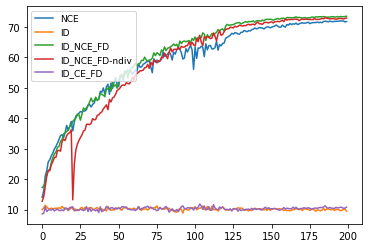

In [3]:
import matplotlib.pyplot as plt

for key in accs.keys():
    plt.plot(accs[key], label=key)
plt.legend(loc=2, fontsize=9)
plt.show()

In [4]:
for key in accs.keys():
    print(f'{key} max: {max(accs[key])}')

NCE max: 72.03
ID max: 11.36
ID_NCE_FD max: 73.55
ID_NCE_FD-ndiv max: 73.08
ID_CE_FD max: 11.81
